In [1]:
import math
%matplotlib inline
%matplotlib widget
#import os
import madmom
import madmom.features.onsets as od
from madmom.audio import Spectrogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
import librosa, librosa.display
import IPython.display as ipd
from mido import MidiFile, MidiTrack, MetaMessage, Message
from midi2txt import bpm2tempo
from midi2txt.settings import midi_drum_map
from midi2txt.txt_to_midi import midi_delta_time, back_from_midi_time
from midi2audio import FluidSynth

from onset_detection import *
from onset_detection.audio import *
from onset_detection.utils import *
from onset_detection.od import *

---

# Onset Detection

This is a Jupyter notebook built to showcase **Onset Detection (OD)** for different audio inputs, namely manually performed tapped ryhthms on surfaces

In [2]:
#Read audio file from path

file_path = tapped_dict["arctic_monkeys"]
audio, sr = read_audio(file_path)
audio = trim_audio(audio, sr, 20, 30)

In [3]:
#Play audio
ipd.Audio(audio, rate=sr) # load a local WAV file

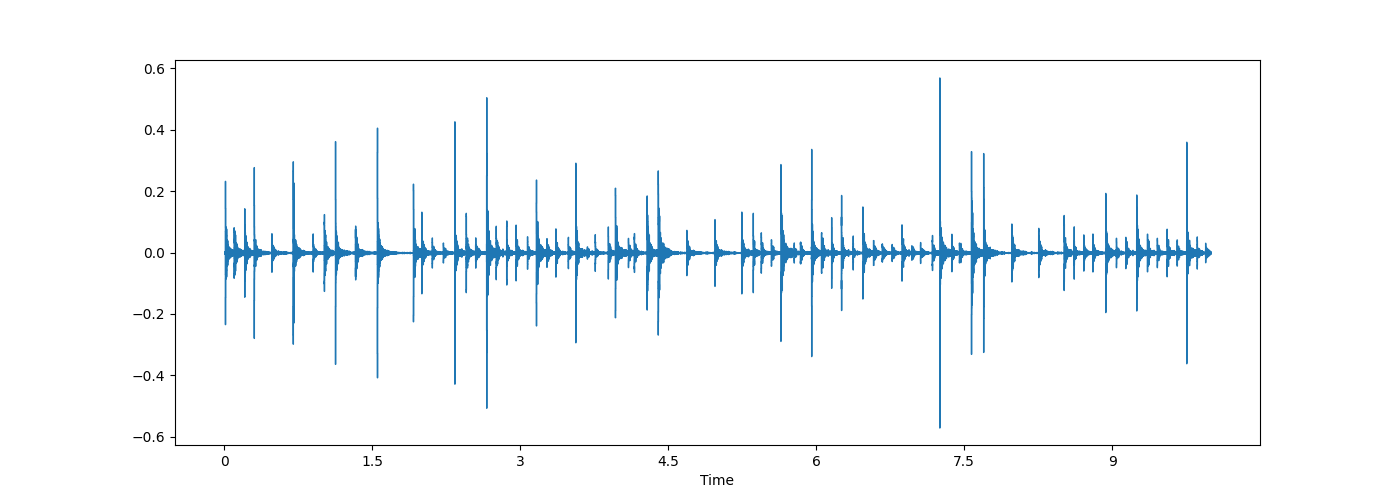

In [4]:
#Visualize waveform
plot_audio(audio, sr)

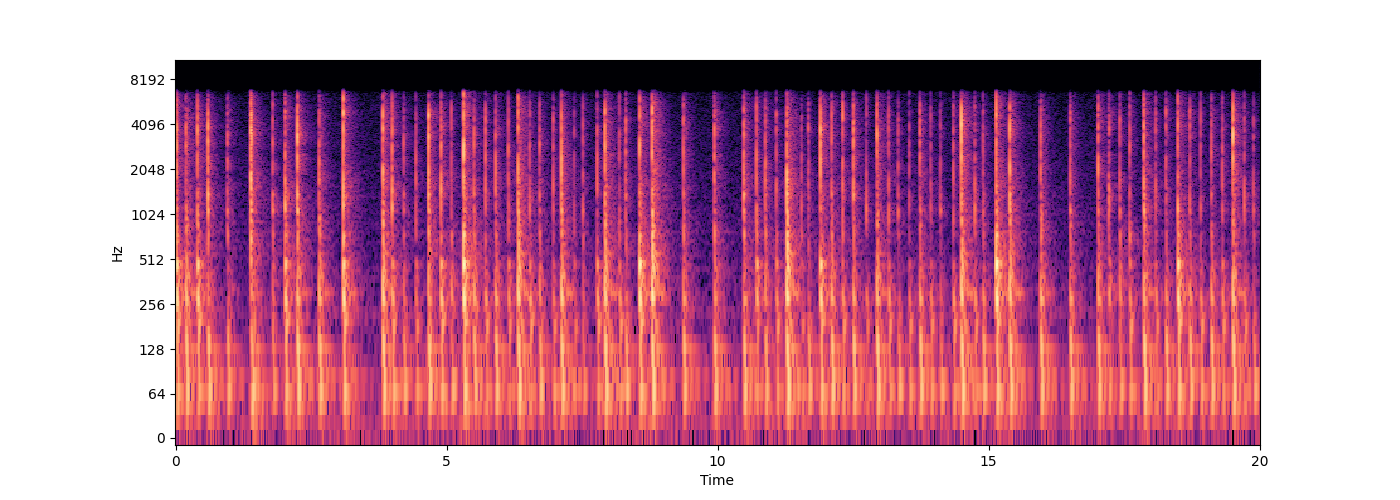

In [5]:
#Show audio spectrogram
plt.close()
show_spectrogram(audio, sr, y_scale='log', frame_size=1024)

In [6]:
spec = madmom_spectrogram(audio)
#spec.shape

## High Frequency Content (HFC) OD

In [7]:
#HFC OD
hfc_df = hfc(spec)
hfc_df = np.asarray(hfc_df)
df = hfc_df
hfc_df_bins = hfc_df.size

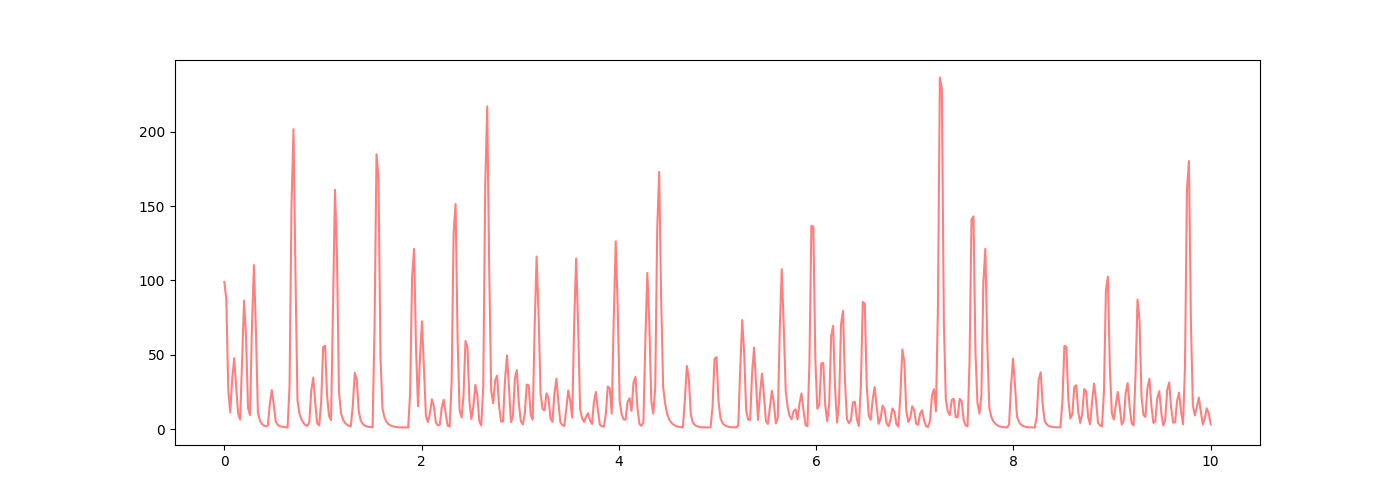

In [8]:
#Plot DF
plot_df(audio, sr, hfc_df_bins, hfc_df)
plt.show()

In [9]:
#Thresholding
b_hfc_df = thresholding(hfc_df, hfc_df_bins)

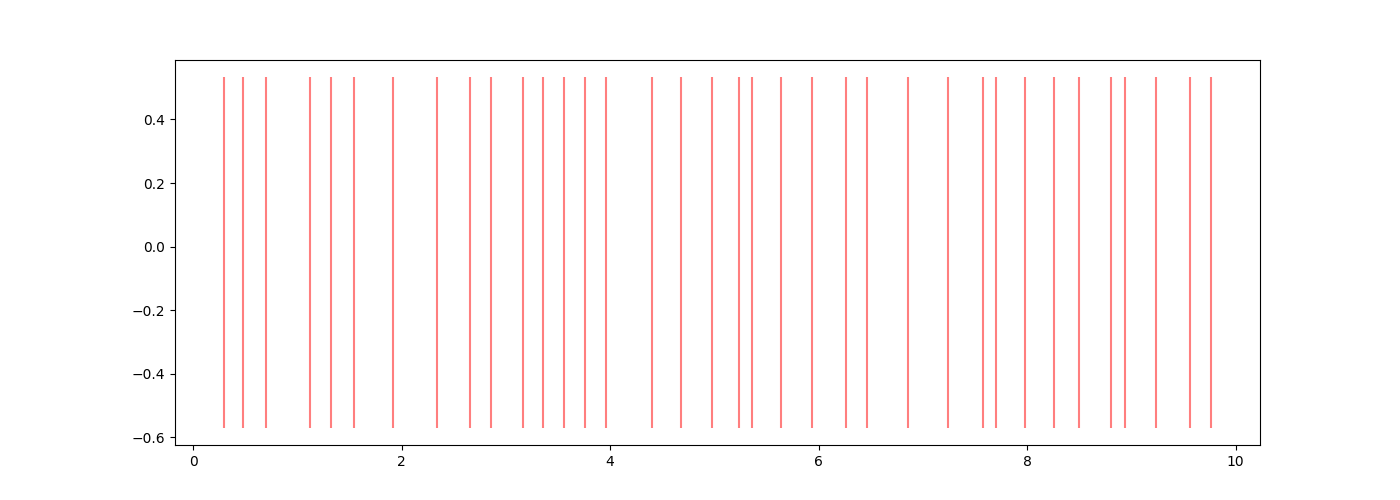

In [10]:
#Plot DF
plt.close()
plot_df(audio, sr, hfc_df_bins, b_hfc_df, c='r', a=0.5)
plt.show()

500


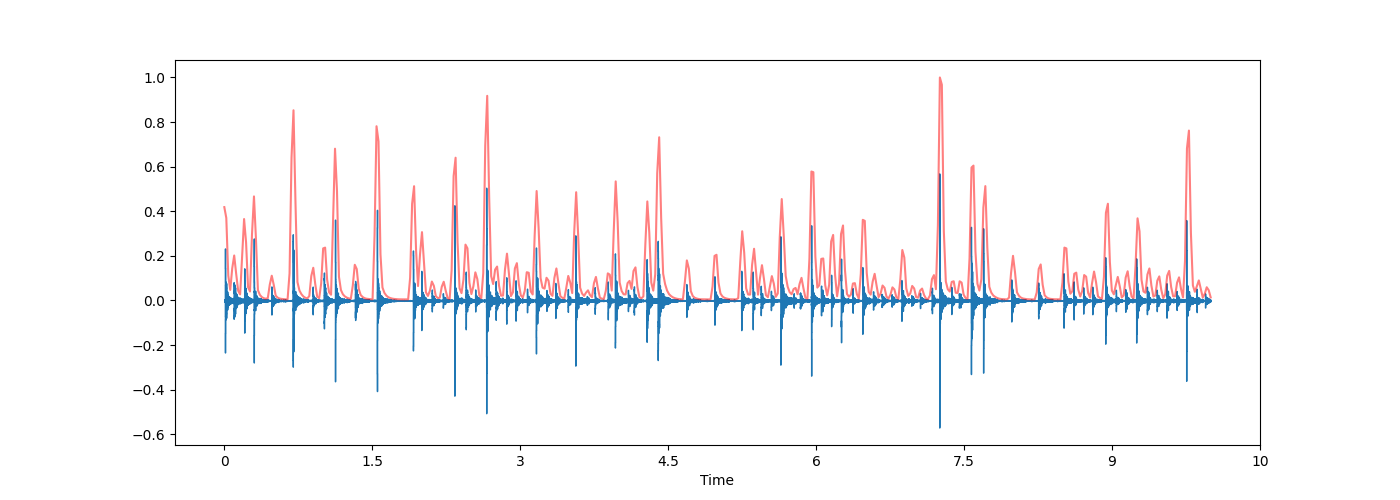

In [11]:
 #Plot Waveform + DF
plt.close()
times = plot_combined(audio, sr, hfc_df_bins, normalize_df(hfc_df))
print(len(times))

## Convolutional Neural Networks (CNN) OD

In [12]:
#CNN OD
cnn_df = cnn_od(audio)
df = cnn_df
cnn_df_bins = cnn_df.size

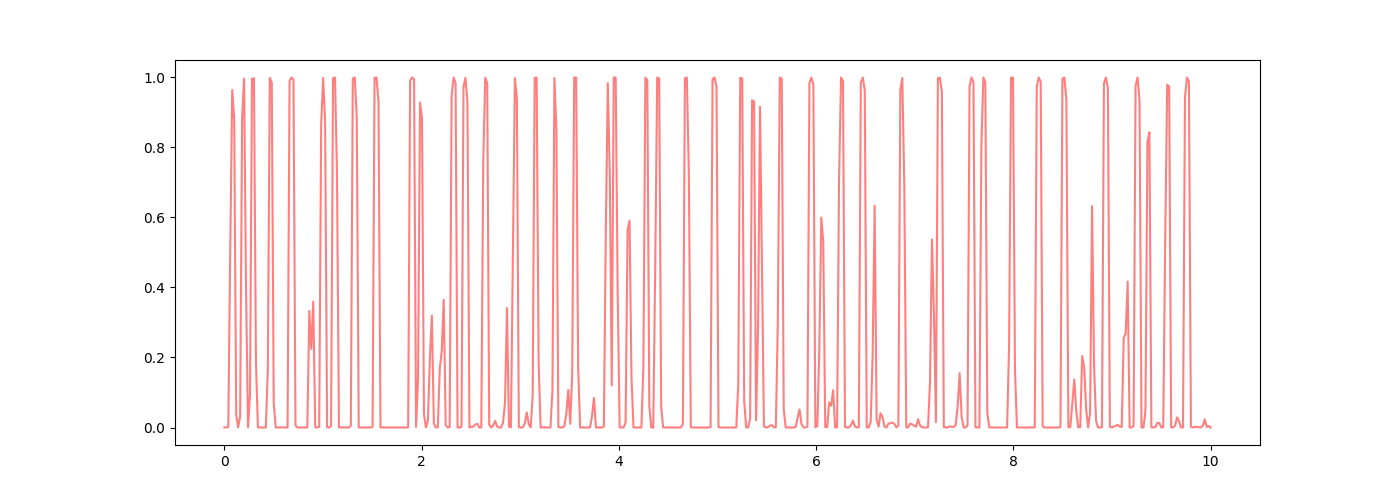

In [13]:
#Plot DF
plt.close()
plot_df(audio, sr, cnn_df_bins, cnn_df)
plt.show()

In [14]:
#Thresholding
#b_cnn_df = thresholding(cnn_df, cnn_df_bins)

In [15]:
#Peak picking
b_cnn_df = peak_picking(cnn_df)

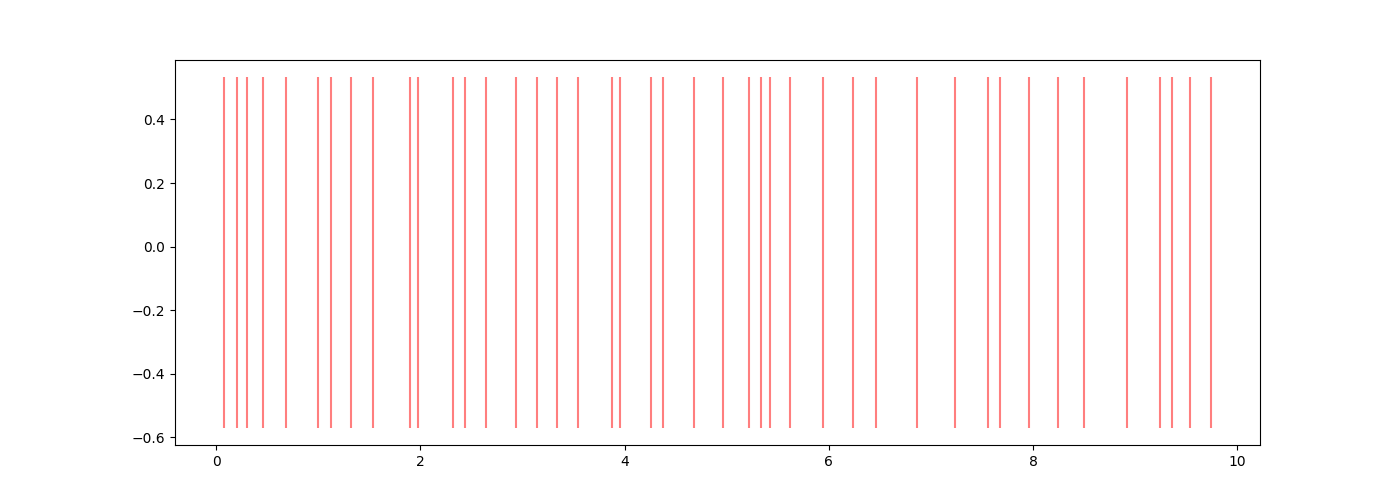

In [16]:
#Plot DF
plt.close()
plot_df(audio, sr, cnn_df_bins, b_cnn_df, c='r', a=0.5)
plt.show()

KeyboardInterrupt: 

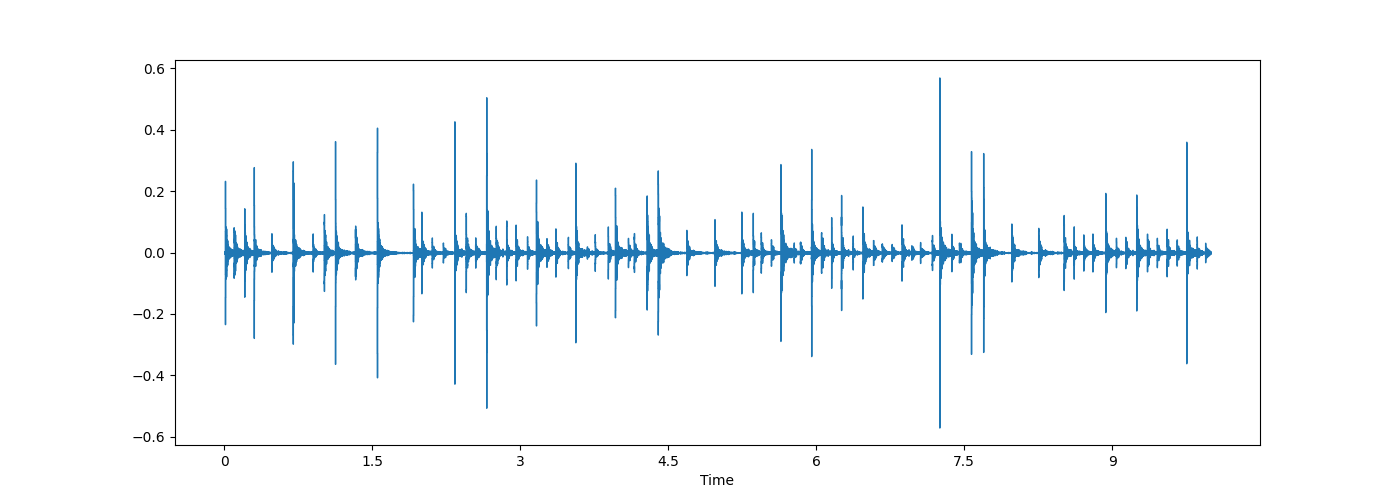

In [21]:
#Plot Waveform + DF
plt.close()
times = plot_combined(audio, sr, cnn_df_bins, b_cnn_df)

## From OD to MIDI

Adapted from [Richard Vogl's midi2txt repository](https://github.com/richard-vogl/midi2txt)

In [20]:
od2midi(file_path, df, times)

KeyboardInterrupt: 

### Playing OD MIDI files 

In [1]:
audio_file_dict = {
    "beatles": "../results/audio/in_my_life-the_beatles-t.flac",
    "queen": "../results/audio/Another One Bites the Dust - Queen - tapped.flac",
    "ac_dc": "../results/audio/ac_dc-back_in_black-tapped.flac",
    "qotsa": "../results/audio/qotsa_no_one_knows-tapped.flac",
    "slowj": "../results/audio/Mundança - Slow J-tapped.flac",
    "arctic_monkeys": "../results/audio/arctic_monkeys-the_view_from_the_afternoon-tapped.flac"
}

ipd.Audio(audio_file_dict['beatles']) # load a local audio file

NameError: name 'ipd' is not defined